In [1]:
import numpy as np
import pandas as pd 
import nltk

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, classification_report

import joblib
# nltk.download()

In [2]:
raw_df = pd.read_csv("datasets/raw_dataset.csv")

raw_df.head()

,words,label
0,dia gemuk,indonesia
1,berkata guru anak-anak jangan takut,indonesia
2,saya bolos sekolah,indonesia
3,"dilihat komariyah ayahnya , pak sulaiman kelua...",indonesia
4,sepertinya masih lama,indonesia


In [3]:
lb = LabelBinarizer()

X = raw_df['words']
y = lb.fit_transform(raw_df['label']).flatten()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [5]:
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = count_vectorizer.transform(X_train)

In [6]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [7]:
prediction = model.predict(count_vectorizer.transform(X_test))

In [8]:
word = ["saya mau makan", "lapah mit sekula"]
test = model.predict(count_vectorizer.transform(word))
print(test)

[0 1]


In [9]:
acc = accuracy_score(y_test, prediction)
cf_matrix = confusion_matrix(y_test, prediction)
cls_report = classification_report(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [25]:
print(f'Accuracy Score : {round(acc, 2) * 100}% \n')
print(f'precision : {round(precision, 2) * 100}% \n')
print(f'recall : {round(recall, 2) * 100}% \n')
print(f'\n Confusion Matrix \n {cf_matrix} \n')
print(f'\n Classification Report \n {cls_report} \n')

Accuracy Score : 97.0% 

precision : 96.0% 

recall : 97.0% 


 Confusion Matrix 
 [[585  23]
 [ 18 574]] 


 Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       608
           1       0.96      0.97      0.97       592

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200
 



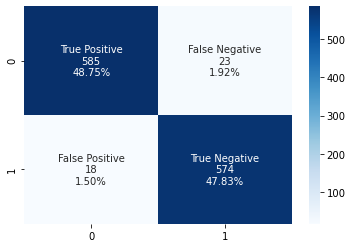

In [24]:
group_names = ['True Positive','False Negative','False Positive','True Negative']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.savefig('plot/confusion_matrix.png', dpi=720)
plt.savefig('plot/confusion_matrix.jpg', dpi=720)

In [12]:
saved_count_vectorizer = joblib.dump(count_vectorizer, 'joblib_model/count_vectorizer.joblib')
saved_model = joblib.dump(model, 'joblib_model/model.joblib')